In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sms = pd.read_csv("sms.csv",usecols=[0,1])
sms

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sms.isnull().sum()

Label      0
Message    0
dtype: int64

In [ ]:
sms.duplicated().sum()

np.int64(403)

In [ ]:
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True,inplace=True)
sms.duplicated().sum()

np.int64(0)

In [ ]:
sms.shape

(5169, 2)

In [ ]:
sms["Label"].value_counts(normalize=True)*100

Label
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x22bc0e6d7b0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

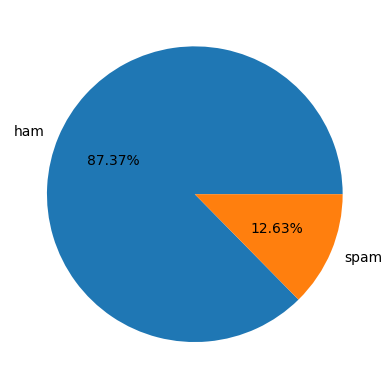

In [ ]:
plt.pie(sms["Label"].value_counts()*100,labels=["ham","spam"],autopct="%1.2f%%")

In [ ]:
mail = pd.read_csv("emails.csv")
mail =mail[["label_num","Message"]]
mail

,label_num,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,0,Subject: calpine daily gas nomination\r\n>\r\n...
5169,0,Subject: industrial worksheets for august 2000...


In [ ]:
mail.isnull().sum()

label_num    0
Message      0
dtype: int64

In [ ]:
mail.duplicated().sum()

np.int64(178)

In [ ]:
mail.drop_duplicates(inplace=True)
mail.reset_index(drop=True,inplace=True)
mail.duplicated().sum()

np.int64(0)

In [ ]:
mail["label_num"].value_counts(normalize=True)*100


label_num
0    70.719007
1    29.280993
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x22bc10c0c40>,
 [Text(-0.6664987851717366, 0.8750882066195381, 'ham'),
  Text(0.6664990703116317, -0.8750879894466217, 'spam')],
 [Text(-0.36354479191185624, 0.4773208399742935, '70.72%'),
  Text(0.36354494744270816, -0.47732072151633903, '29.28%')])

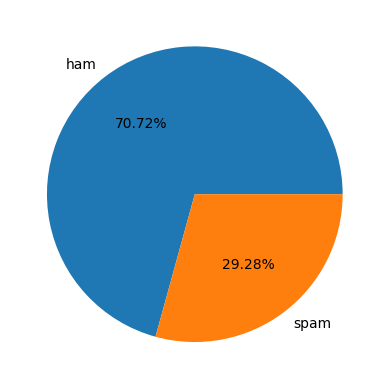

In [ ]:
plt.pie(mail["label_num"].value_counts()*100,labels=["ham","spam"],autopct="%1.2f%%")

In [ ]:
mail["label_num"]
mail.rename(columns={"label_num":"Label"},inplace=True)

In [ ]:
sms["Label"]= sms["Label"].map({"ham":0,"spam":1})

In [ ]:
mergeData = pd.concat([sms,mail],axis=0,ignore_index=True)
mergeData

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10157,0,"Subject: fw : crosstex energy , driscoll ranch..."
10158,0,Subject: put the 10 on the ft\r\nthe transport...
10159,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160,0,Subject: industrial worksheets for august 2000...


In [ ]:
mergeData["Label"].value_counts(normalize=True)*100

Label
0    79.187168
1    20.812832
Name: proportion, dtype: float64

In [ ]:
mergeData.to_csv("Messages.csv",index=False)

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**preprocessing** *

In [ ]:
Messages =pd.read_csv("Messages.csv")
Messages

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10157,0,"Subject: fw : crosstex energy , driscoll ranch..."
10158,0,Subject: put the 10 on the ft\r\nthe transport...
10159,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160,0,Subject: industrial worksheets for august 2000...


In [ ]:
data =Messages["Message"]
data

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
10157    Subject: fw : crosstex energy , driscoll ranch...
10158    Subject: put the 10 on the ft\r\nthe transport...
10159    Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160    Subject: industrial worksheets for august 2000...
10161    Subject: important online banking alert\r\ndea...
Name: Message, Length: 10162, dtype: object

In [ ]:
import nltk

# Download the required resources(if face any error buddy )
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...


True

In [ ]:
def preprocessor(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  #tokenization
  words = text.split()

  #stop word removal and lemmatization
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  words_without_stopwords = [i for i in words if i not in stop_words]
  lemmatizer_words =[lemmatizer.lemmatize(i) for i in words_without_stopwords]

  return " ".join(lemmatizer_words)

Messages["preprocess_messages"] = Messages["Message"].apply(preprocessor)


**Feature Extraction using TF-IDF**

In [ ]:
X =Messages["preprocess_messages"]

In [ ]:
X

0        go jurong point crazy available bugis n great ...
1                                  ok lar joking wif u oni
2        free entry 2 wkly comp win fa cup final tkts 2...
3                      u dun say early hor u c already say
4                 nah dont think go usf life around though
                               ...                        
10157    subject fw crosstex energy driscoll ranch 1 3 ...
10158    subject put 10 ft transport volume decreased 2...
10159    subject 3 4 2000 following noms hpl take extra...
10160    subject industrial worksheet august 2000 activ...
10161    subject important online banking alert dear va...
Name: preprocess_messages, Length: 10162, dtype: object

In [ ]:
print(type(X))
X.shape

<class 'pandas.core.series.Series'>


(10162,)

In [ ]:
y=Messages["Label"]
y

0        0
1        0
2        1
3        0
4        0
        ..
10157    0
10158    0
10159    0
10160    0
10161    1
Name: Label, Length: 10162, dtype: int64

Model training , select best models

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7113,), (3049,), (7113,), (3049,))

## Select the best model
- so here we have some list of the best text classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others
 - SVM
 - MultinomialNB
 - BernoulliNB
 - xgboost

In [ ]:

def model_selection(X,y,models,vectorizer):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  x_train = vectorizer.fit_transform(x_train)
  x_test = vectorizer.transform(x_test)

  Models=[]
  scores=[]

  for model in models:
    model.fit(x_train,y_train)
    y_pred =model.predict(x_test)
    score= accuracy_score(y_test,y_pred)
    scores.append(score)
    Models.append(model)
    print(f"{model} : {score}")

  report =pd.DataFrame()
  report["Models"]=Models
  report["Scores"]=scores
  return report


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB ,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

models=[
    SVC(),
    MultinomialNB(),
    BernoulliNB()
     XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        eval_metric='logloss',
        random_state=42
    )
     ]
report= model_selection(X,y,models,TfidfVectorizer())


SVC() : 0.9650762420068864
MultinomialNB() : 0.897196261682243
BernoulliNB() : 0.8548942449581899


In [ ]:
report.sort_values(by="Scores",ascending=False)

,Models,Scores
0,SVC(),0.965076
1,MultinomialNB(),0.897196
2,BernoulliNB(),0.854894


- ### From the report above we can see that the SVM model performed the best, so we will continue training our model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8129, 46863)
X_test shape: (2033, 46863)
y_train shape: (8129,)
y_test shape: (2033,)


SVM tries to draw the widest possible boundary between classes, so new points can be classified with maximum confidence.

In [62]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV

param={
    "C": [2.11,2.21,2.25,2.28,2.35,2.4]
}
print("parameters :",param)

svc_model = SVC()
svc_cv = GridSearchCV(svc_model, param, cv = 10,scoring="accuracy",verbose=1,n_jobs=-1)
svc_cv.fit(X_train, y_train)

parameters : {'C': [2.11, 2.21, 2.25, 2.28, 2.35, 2.4]}
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2.11, 2.21, 2.25, 2.28, 2.35, 2.4]},
             scoring='accuracy', verbose=1)

In [63]:
#best param
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 2.21}
accuracy : 0.9543591211774187


In [64]:
spam_detect_model = SVC(**svc_cv.best_params_)
spam_detect_model.fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model is {accuracy}")
print(f"The confusion matrix is: \n{confusion_m}")


Accuracy of the model is 0.970486965076242
The confusion matrix is: 
[[1608    7]
 [  53  365]]


In [65]:
from sklearn.metrics import classification_report,precision_score,f1_score
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred)*100)

0.9240506329113924
98.11827956989248


In [66]:
import pickle
with open("model.pkl","wb") as file:
  pickle.dump(spam_detect_model,file)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# For flask

In [67]:
lemmatizer = WordNetLemmatizer()

def preprocess_text_unseen_data(text,vectorizer):
  text =text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  words = text.split()
  stop_words = set(stopwords.words('english'))
  words_without_stopwords = [i for i in words if i not in stop_words]
  lemmatizer_words =[lemmatizer.lemmatize(i) for i in words_without_stopwords]
  documents= " ".join(lemmatizer_words)
  return vectorizer.transform([documents])


In [68]:
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

with open("vectorizer.pkl","rb") as file:
    loaded_vectorized= pickle.load(file)

# Use it for prediction



In [69]:
text ="FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv"
preprocessed_text = preprocess_text_unseen_data(text,loaded_vectorized)
predictions = loaded_model.predict(preprocessed_text)
print(predictions)

[1]


In [70]:
#create pipeline
#message - lower case -remove stopwords -tokenization -lemmatization- vectorizer -prediction

In [ ]:
from IPython.display import Image
Image(filename='Gemini_Generated_Image_2nq3oj2nq3oj2nq3.png')
# path ="static\images\Gemini_Generated_Image_2nq3oj2nq3oj2nq3.png"